In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the dataset from a CSV file
df = pd.read_csv("heart.csv")

# 2. Basic info
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [2]:

# 3. Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# 4. Check for nulls or missing values
print("\nMissing Values:\n", df.isnull().sum())



Descriptive Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000   

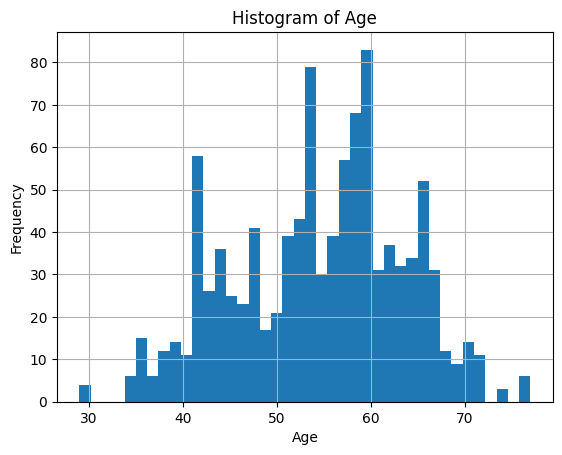

In [7]:
# HISTOGRAM: Distribution of 'age'
plt.figure()
df['age'].hist(bins=40)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


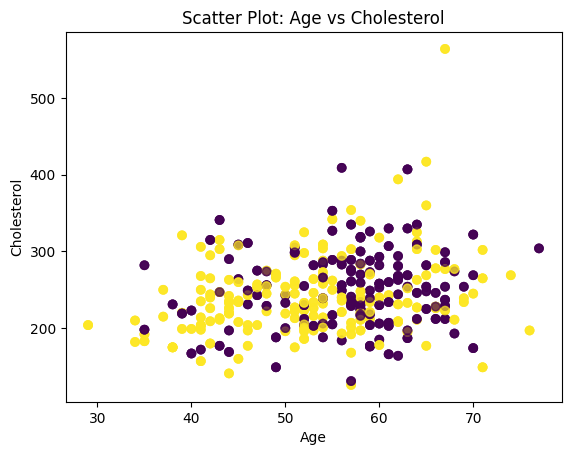

In [8]:
# SCATTER PLOT: Relationship between 'chol' (cholesterol) and 'age'
plt.figure()
plt.scatter(df['age'], df['chol'], c=df['target'], alpha=0.7)
plt.title('Scatter Plot: Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate features (X) and target (y)
# Assuming the last column is 'target' or rename accordingly
X = df.drop('target', axis=1).values
y = df['target'].values

# 1) No Preprocessing
X_no_prep = X.copy()

# 2) Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

# 3) Standard (Z-score) Scaling
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

print("Shapes:", X_no_prep.shape, X_minmax.shape, X_std.shape)


Shapes: (1025, 13) (1025, 13) (1025, 13)


In [10]:
# We'll make a copy just to see the effect on 'age'
df_binned = df.copy()

# Example: 3 bins for age
df_binned['age_binned'] = pd.qcut(df_binned['age'], q=3, labels=['Young','Middle','Older'])

print(df_binned[['age', 'age_binned']].head(10))


   age age_binned
0   52     Middle
1   53     Middle
2   70      Older
3   61      Older
4   62      Older
5   58     Middle
6   58     Middle
7   55     Middle
8   46      Young
9   54     Middle


In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 1) No Preprocessing
scores_no_prep = cross_val_score(clf, X_no_prep, y, cv=kf, scoring='accuracy')


In [19]:
# 2) Min-Max
scores_minmax = cross_val_score(clf, X_minmax, y, cv=kf, scoring='accuracy')

# 3) Standard
scores_std = cross_val_score(clf, X_std, y, cv=kf, scoring='accuracy')

print("Accuracy (No Preprocessing): {:.4f}".format(scores_no_prep.mean()))
print("Accuracy (Min-Max Scaling):  {:.4f}".format(scores_minmax.mean()))
print("Accuracy (Standard Scaling): {:.4f}".format(scores_std.mean()))


Accuracy (No Preprocessing): 0.9971
Accuracy (Min-Max Scaling):  0.9971
Accuracy (Standard Scaling): 0.9971


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

# Train-test split (example)
X_train, X_test, y_train, y_test = train_test_split(X_no_prep, y, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]


In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (No Preprocessing):\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)


Confusion Matrix (No Preprocessing):
 [[100   0]
 [  0 105]]
Accuracy: 1.0


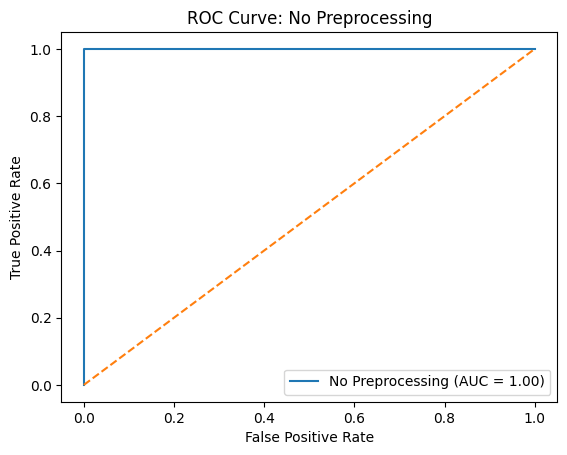

In [21]:
plt.figure()
plt.plot(fpr, tpr, label='No Preprocessing (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: No Preprocessing')
plt.legend()
plt.show()

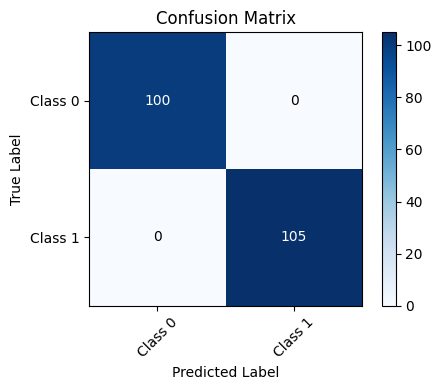

In [17]:
from sklearn.metrics import confusion_matrix


# 1. Calculate the confusion matrix
# 2. Create a plot
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

# 3. Add a color bar to the side (optional)
plt.colorbar()

# (Optional) Define class labels if you have them, e.g.:
class_names = ["Class 0", "Class 1"]

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# 4. Annotate each cell with the corresponding count
thresh = cm.max() / 2.0  # threshold to decide text color
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()